Mean Squared Error: 5.0397345205479445
Cross-validation scores: [-5.11808411 -4.28285973 -4.22488575 -4.85218603 -3.39291233]
Mean CV error: 4.3741855890410966


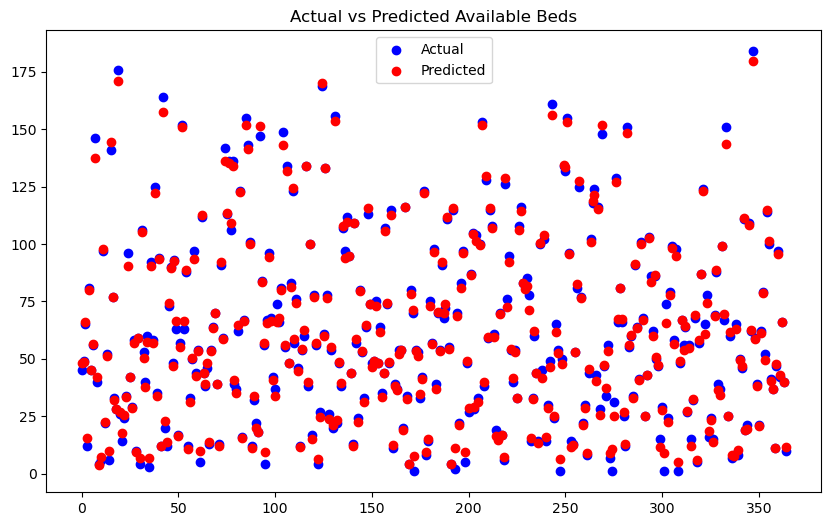

2025-02-05 21:54:18.961 
  command:

    streamlit run C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import streamlit as st

def generate_data(num_hospitals=5, num_days=365):
    np.random.seed(42)
    data = []
    for hospital_id in range(1, num_hospitals + 1):
        for day in range(num_days):
            total_beds = np.random.randint(50, 200)
            occupied_beds = np.random.randint(10, total_beds)
            admissions = np.random.randint(0, 30)
            discharges = np.random.randint(0, 30)
            weekday = day % 7
            data.append([hospital_id, day, total_beds, occupied_beds, admissions, discharges, weekday])
    columns = ["Hospital_ID", "Day", "Total_Beds", "Occupied_Beds", "Admissions", "Discharges", "Weekday"]
    return pd.DataFrame(data, columns=columns)

data = generate_data()

data["Available_Beds"] = data["Total_Beds"] - data["Occupied_Beds"]
data["Admission_Rate"] = data["Admissions"] / data["Total_Beds"]
data["Discharge_Rate"] = data["Discharges"] / data["Total_Beds"]

X = data[["Day", "Weekday", "Total_Beds", "Occupied_Beds", "Admissions", "Discharges"]]
y = data["Available_Beds"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation scores:", scores)
print("Mean CV error:", -scores.mean())

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color="blue")
plt.scatter(range(len(y_test)), y_pred, color="red")
plt.legend(["Actual", "Predicted"])
plt.title("Actual vs Predicted Available Beds")
plt.show()

def main():
    st.title("Hospital Bed Vacancy Prediction System")
    st.write("This system predicts the number of available beds for a hospital based on historical data.")

    hospital_id = st.selectbox("Select Hospital ID", data["Hospital_ID"].unique())
    day = st.slider("Day of the year (0-364)", 0, 364, 0)
    weekday = day % 7
    total_beds = st.number_input("Total Beds", min_value=10, max_value=200, value=100)
    occupied_beds = st.slider("Occupied Beds", 0, total_beds, total_beds // 2)
    admissions = st.number_input("Admissions Today", min_value=0, max_value=30, value=5)
    discharges = st.number_input("Discharges Today", min_value=0, max_value=30, value=3)

    input_data = pd.DataFrame([[day, weekday, total_beds, occupied_beds, admissions, discharges]],
                              columns=["Day", "Weekday", "Total_Beds", "Occupied_Beds", "Admissions", "Discharges"])
    prediction = model.predict(input_data)[0]

    st.write(f"### Predicted Available Beds: {int(prediction)}")
    st.write("Note: Prediction is based on simulated data and may not reflect real-world conditions.")

if __name__ == "__main__":
    main()
